# 增加行銷成功率 預測成功模型
    #客戶屬性 電話行銷技巧 過往紀錄 大環境

In [89]:
import pandas as pd

data_raw = pd.read_csv('bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)
print(data_raw.head())
print(data_raw.info())

# month: last contact month of year
# day_of_week: last contact day of the week
# duration: last contact duration, in seconds.
# campaign: number of contacts performed during this campaign and for this client 
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# previous: number of contacts performed before this campaign and for this client 
# poutcome: outcome of the previous marketing campaign 
# emp.var.rate: employment variation rate 
# cons.price.idx: consumer price index (monthly)
# cons.conf.idx: consumer confidence index (monthly)
# euribor3m: euribor 3 month rate (daily)
# nr.employed: number of employees (quarterly)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [2]:
data1 = data_raw.copy(deep = True)


#dataset['job'] = dataset['job'].map( {'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':0} ).astype(int)
#dataset['marital'] = dataset['marital'].map( {'divorced':1,'married':2,'single':3,'unknown':0} ).astype(int)
#dataset['education'] = dataset['education'].map( { 'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'illiterate':5,'professional.course':6,'university.degree':7,'unknown':0} ).astype(int)
#dataset['default'] = dataset['default'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
#dataset['housing'] = dataset['housing'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
#dataset['loan'] = dataset['loan'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
#dataset['contact'] = dataset['contact'].map( { 'cellular':1,'telephone':2} ).astype(int)
data1['y'] = data1['y'].map( {'yes': 1, 'no': 0} ).astype(int)


Target = ['y']

data_x = data1.drop(columns=['y'])

for x in data_x:
    if data1[x].dtype != 'float64' :
        print('Successful Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print(pd.crosstab(data1[x],data1[Target[0]]))
        print('-'*10, '\n')
        


Successful Correlation by: age
    age         y
0    17  0.400000
1    18  0.428571
2    19  0.476190
3    20  0.353846
4    21  0.284314
..  ...       ...
73   91  0.000000
74   92  0.750000
75   94  0.000000
76   95  0.000000
77   98  1.000000

[78 rows x 2 columns]
y     0   1
age        
17    3   2
18   16  12
19   22  20
20   42  23
21   73  29
..   ..  ..
91    2   0
92    1   3
94    1   0
95    1   0
98    0   2

[78 rows x 2 columns]
---------- 

Successful Correlation by: job
              job         y
0          admin.  0.129726
1     blue-collar  0.068943
2    entrepreneur  0.085165
3       housemaid  0.100000
4      management  0.112175
5         retired  0.252326
6   self-employed  0.104856
7        services  0.081381
8         student  0.314286
9      technician  0.108260
10     unemployed  0.142012
11        unknown  0.112121
y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid    

y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894
---------- 



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
0           1.1          93

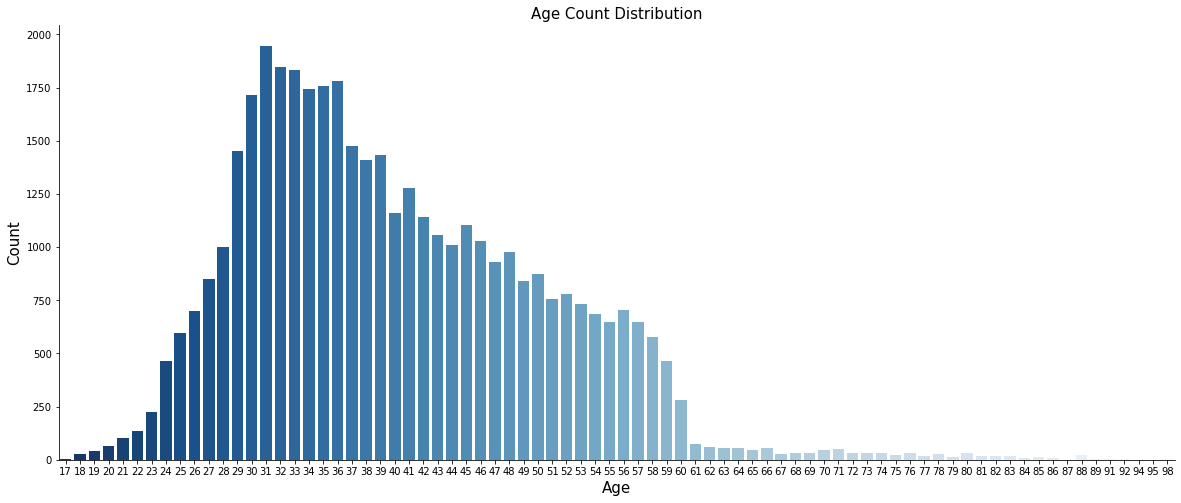

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

#print(data1[['job','age']].groupby('job', as_index=False).mean())
data1['ageband'] = data1['age'].copy()

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns_plot = sns.countplot(x = 'age', data = data1, palette="Blues_r")
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
fig = sns_plot.get_figure()
fig.savefig('C://Users/carter840826/bank marketing/Age Count Distribution.png',dpi = 600)

data1.loc[ data1['age'] <= 25, 'ageband'] = 0
data1.loc[(data1['age'] > 25) & (data1['age'] <= 35), 'ageband'] = 1
data1.loc[(data1['age'] > 35) & (data1['age'] <= 45), 'ageband'] = 2
data1.loc[(data1['age'] > 45) & (data1['age'] <= 55), 'ageband'] = 3
data1.loc[(data1['age'] > 55) & (data1['age'] <= 65), 'ageband'] = 4
data1.loc[ data1['age'] > 65, 'ageband'] = 5

print(data1.head())

<Figure size 432x288 with 0 Axes>

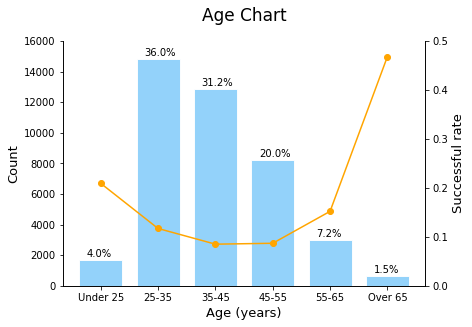

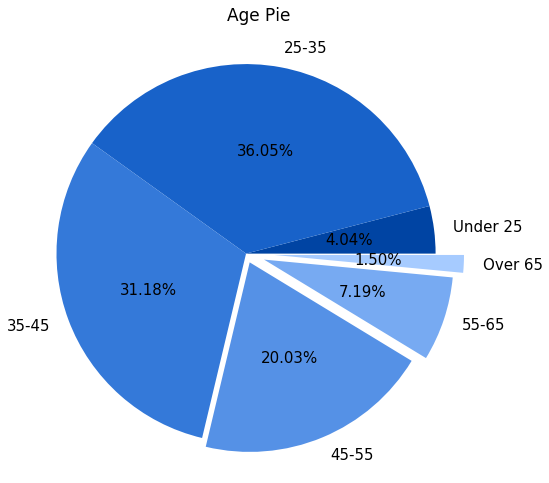

In [268]:
fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,4.5))
ax2 = ax1.twinx() 

ax1.spines['top'].set_visible(False)
x = [1,2,3,4,5,6]
y1 = [data1[data1['ageband']==0]['ageband'].count(),data1[data1['ageband']==1]['ageband'].count(),data1[data1['ageband']==2]['ageband'].count(),data1[data1['ageband']==3]['ageband'].count(),data1[data1['ageband']==4]['ageband'].count(),data1[data1['ageband']==5]['ageband'].count()]
y2 = [data1[data1['ageband']==0]['y'].mean(),data1[data1['ageband']==1]['y'].mean(),data1[data1['ageband']==2]['y'].mean(),data1[data1['ageband']==3]['y'].mean(),data1[data1['ageband']==4]['y'].mean(),data1[data1['ageband']==5]['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.75, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['Under 25','25-35','35-45','45-55','55-65','Over 65'])
ax1.set_xlabel('Age (years)', fontsize = 13)
ax1.set_ylabel('Count', fontsize = 13)
ax1.set_ylim([0,16000])

for i in range(6):
    ax1.text(x[i]-0.24,y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.spines['top'].set_visible(False)
ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.5])
ax2.set_ylabel('Successful rate', fontsize = 13)

plt.title('Age Chart', pad = 20, fontsize = 17)
plt.savefig('C://Users/carter840826/bank marketing/Age Chart.png',dpi = 600)
plt.show()





fig = plt.figure(figsize=(8,8))

y = [data1[data1['ageband']==0]['ageband'].count(),data1[data1['ageband']==1]['ageband'].count(),data1[data1['ageband']==2]['ageband'].count(),data1[data1['ageband']==3]['ageband'].count(),data1[data1['ageband']==4]['ageband'].count(),data1[data1['ageband']==5]['ageband'].count()]

plt.pie(y, labels = ['Under 25 ','25-35','35-45','45-55','55-65','Over 65'], 
        autopct = "%1.2f%%", 
        explode = (0,0,0,0.05,0.1,0.15),
        pctdistance = 0.55, 
        textprops = {"fontsize" : 15}, 
        colors = ['#0044a3','#1862c9','#3479d9','#5591e6','#77aaf2','#a6cbff']
       )
plt.axis('equal')
plt.title('Age Pie', fontsize=17, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Age Pie.png',dpi = 600)
plt.show()


<Figure size 432x288 with 0 Axes>

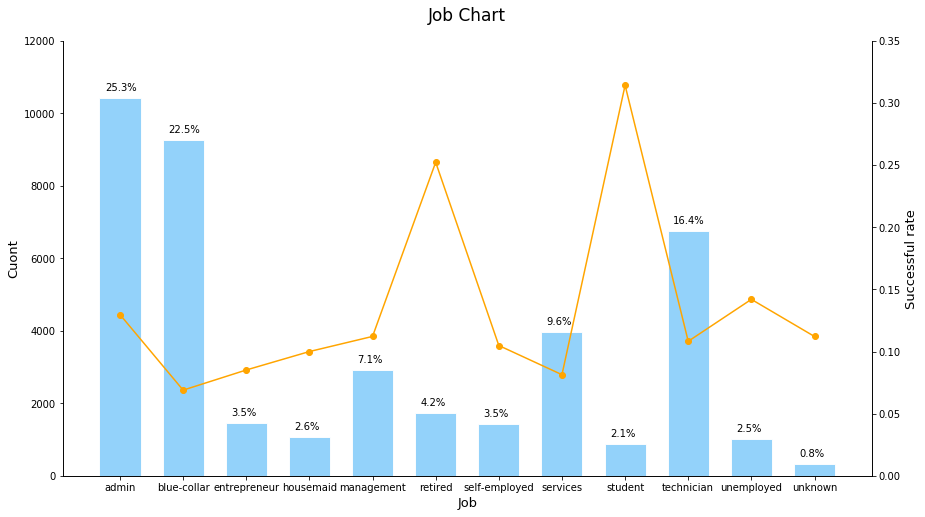

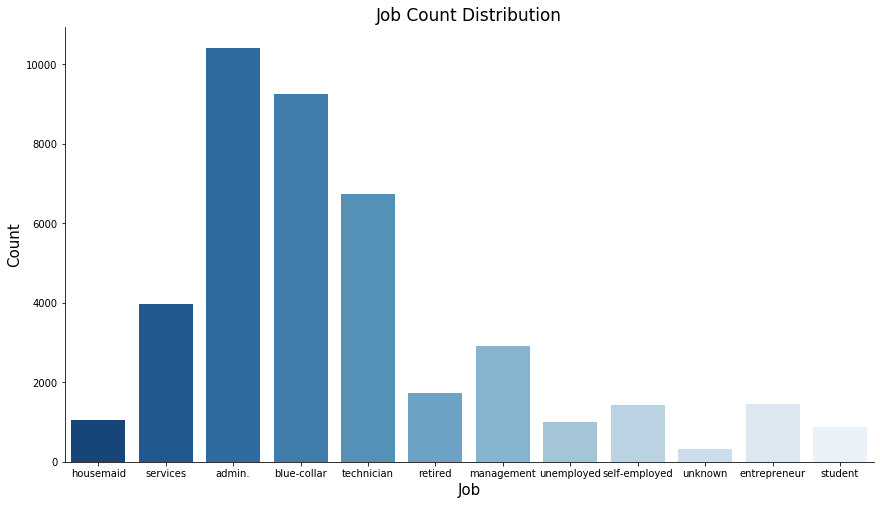

In [271]:
fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(14.5,8))
ax2 = ax1.twinx() 

x = [1,2,3,4,5,6,7,8,9,10,11,12]
y1 = [data1[data1['job']=='admin.']['job'].count(),data1[data1['job']=='blue-collar']['job'].count(),data1[data1['job']=='entrepreneur']['job'].count(),data1[data1['job']=='housemaid']['job'].count(),data1[data1['job']=='management']['job'].count(),data1[data1['job']=='retired']['job'].count(),data1[data1['job']=='self-employed']['job'].count(),data1[data1['job']=='services']['job'].count(),data1[data1['job']=='student']['job'].count(),data1[data1['job']=='technician']['job'].count(),data1[data1['job']=='unemployed']['job'].count(),data1[data1['job']=='unknown']['job'].count()]
y2 = [data1[data1['job']=='admin.']['y'].mean(),data1[data1['job']=='blue-collar']['y'].mean(),data1[data1['job']=='entrepreneur']['y'].mean(),data1[data1['job']=='housemaid']['y'].mean(),data1[data1['job']=='management']['y'].mean(),data1[data1['job']=='retired']['y'].mean(),data1[data1['job']=='self-employed']['y'].mean(),data1[data1['job']=='services']['y'].mean(),data1[data1['job']=='student']['y'].mean(),data1[data1['job']=='technician']['y'].mean(),data1[data1['job']=='unemployed']['y'].mean(),data1[data1['job']=='unknown']['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.65, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['admin','blue-collar','entrepreneur','housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'])
ax1.set_xlabel('Job', fontsize=13)
ax1.set_ylabel('Cuont', fontsize=13)
ax1.set_ylim([0,12000])

for i in range(12):
    ax1.text(x[i]-0.24,y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.35])
ax2.set_ylabel('Successful rate', fontsize=13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Job Chart', fontsize=17, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Job Chart.png',dpi = 600)
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(14.5, 8)
sns_plot = sns.countplot(x = 'job', data = data1, palette="Blues_r")
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=17)
sns.despine()
fig = sns_plot.get_figure()
fig.savefig('C://Users/carter840826/bank marketing/Job Count Distribution.png',dpi = 600)
plt.show()

<Figure size 432x288 with 0 Axes>

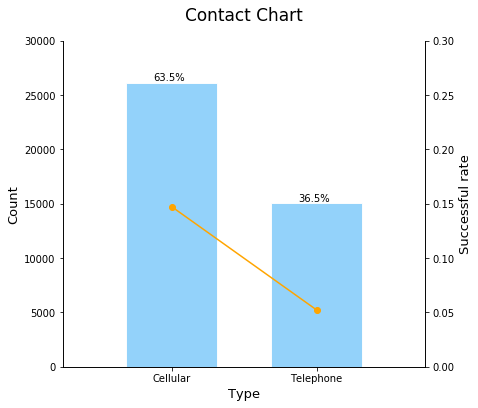

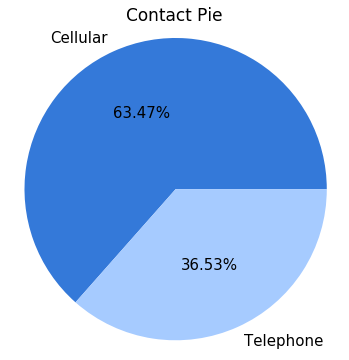

In [273]:
fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,6))
ax2 = ax1.twinx() 

x = [1.1,1.9]
y1 = [data1[data1['contact']=='cellular']['contact'].count(),data1[data1['contact']=='telephone']['contact'].count()]
y2 = [data1[data1['contact']=='cellular']['y'].mean(),data1[data1['contact']=='telephone']['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.5, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['Cellular','Telephone'])
ax1.set_xlabel('Type',fontsize=13)
ax1.set_ylabel('Count',fontsize=13)
ax1.set_ylim([0,30000])
ax1.set_xlim([0.5,2.5])

for i in range(2):
    ax1.text(x[i]-0.1,y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.3])
ax2.set_ylabel('Successful rate',fontsize=13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Contact Chart',fontsize=17, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Contact Chart.png',dpi = 600)
plt.show()




fig = plt.figure(figsize=(6,6))

y = [data1[data1['contact']=='cellular']['contact'].count(),data1[data1['contact']=='telephone']['contact'].count()]

plt.pie(y, labels = ['Cellular','Telephone'], 
        autopct = "%1.2f%%", 
        pctdistance = 0.55, 
        textprops = {"fontsize" : 15}, 
        colors = ['#3479d9','#a6cbff']
       )
plt.axis('equal')
plt.title('Contact Pie', fontsize=17)
plt.savefig('C://Users/carter840826/bank marketing/Contact Pie.png',dpi = 600)
plt.show()

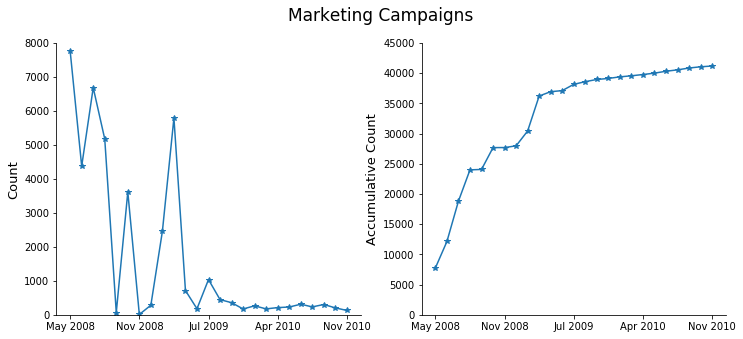

In [274]:
# 7764 may 2008, 12138 jun 2008, 18823 jul 2008, 23998 aug 2008, 24065 oct 2008, 27681 nov 2008, 27691 dec 2008
# 27973 mar 2009, 30431 apr 2009, 36225 may 2009, 36940 jun 2009, 37118 jul 2009, 38155 sep 2009, 38602 oct 2009, 38959 nov 2009, 39131 dec 2009
# 39395 mar 2010, 39569 apr 2010, 39781 may 2010, 40010 jun 2010, 40321 jul 2010, 40554 aug 2010, 40857 sep 2010, 41061 oct 2010, 41189 nov 2010

day = [0,7764,12138,18823,23998,24065,27681,27691,27973,30431,36225,36940,37118,38155,38602,38959,39131,39395,39569,39781,40010,40321,40554,40857,41061,41189]
count = []
for i in range(1,len(day)):
    count.append(day[i]-day[i-1])

    
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Marketing Campaigns',fontsize=17)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

ax1.plot(count,'*-')
ax1.set_ylabel('Count',fontsize=13)
ax1.set_ylim([0,8000])
plt.sca(ax1)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

del(day[0])
ax2.plot(day,'*-')
ax2.set_ylim([0,45000])
ax2.set_ylabel('Accumulative Count',fontsize=13)
plt.sca(ax2)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.savefig('C://Users/carter840826/bank marketing/Campaigns Time-series.png',dpi = 600)
plt.show()

<Figure size 432x288 with 0 Axes>

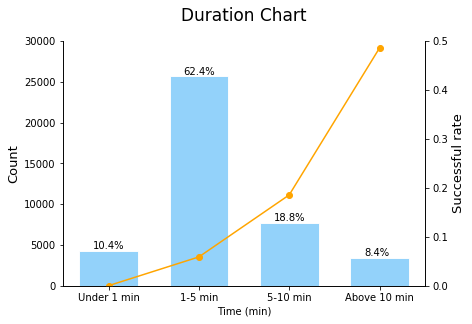

In [275]:
data1['duration_band'] = data1['duration'].copy()
    
data1.loc[ data1['duration'] <= 60, 'duration_band'] = 0
data1.loc[(data1['duration'] > 60) & (data1['duration'] <= 300), 'duration_band'] = 1
data1.loc[(data1['duration'] > 300) & (data1['duration'] <= 600), 'duration_band'] = 2
data1.loc[ data1['duration'] > 600, 'duration_band'] = 3

fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,4.5))
ax2 = ax1.twinx() 

x = [1,2,3,4]
y1 = [data1[data1['duration_band']==0]['duration_band'].count(),data1[data1['duration_band']==1]['duration_band'].count(),data1[data1['duration_band']==2]['duration_band'].count(),data1[data1['duration_band']==3]['duration_band'].count()]
y2 = [data1[data1['duration_band']==0]['y'].mean(),data1[data1['duration_band']==1]['y'].mean(),data1[data1['duration_band']==2]['y'].mean(),data1[data1['duration_band']==3]['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.65, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['Under 1 min','1-5 min','5-10 min','Above 10 min'])
ax1.set_xlabel('Time (min)')
ax1.set_ylim([0,30000])
ax1.set_ylabel('Count',fontsize=13)

for i in range(4):
    ax1.text(x[i]-0.17, y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.5])
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Successful rate',fontsize=13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Duration Chart',fontsize=17, pad = 20)

plt.savefig('C://Users/carter840826/bank marketing/Duration Chart.png',dpi = 600)
plt.show()

<Figure size 432x288 with 0 Axes>

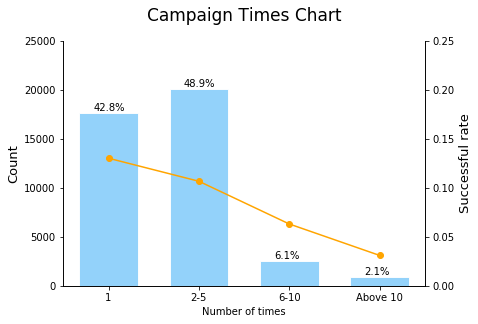

In [276]:
#campaign previous
data1['campaign_band'] = data1['campaign'].copy()
    
data1.loc[ data1['campaign'] <= 1, 'campaign_band'] = 0
data1.loc[(data1['campaign'] > 1) & (data1['campaign'] <= 5), 'campaign_band'] = 1
data1.loc[(data1['campaign'] > 5) & (data1['campaign'] <= 10), 'campaign_band'] = 2
data1.loc[ data1['campaign'] > 10, 'campaign_band'] = 3

fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,4.5))
ax2 = ax1.twinx() 

x = [1,2,3,4]
y1 = [data1[data1['campaign_band']==0]['campaign_band'].count(),data1[data1['campaign_band']==1]['campaign_band'].count(),data1[data1['campaign_band']==2]['campaign_band'].count(),data1[data1['campaign_band']==3]['campaign_band'].count()]
y2 = [data1[data1['campaign_band']==0]['y'].mean(),data1[data1['campaign_band']==1]['y'].mean(),data1[data1['campaign_band']==2]['y'].mean(),data1[data1['campaign_band']==3]['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.65, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['1','2-5','6-10','Above 10'])
ax1.set_xlabel('Number of times')
ax1.set_ylim([0,25000])
ax1.set_ylabel('Count', fontsize= 13)

for i in range(4):
    ax1.text(x[i]-0.17, y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.25])
ax2.set_xlabel('Number of times', fontsize= 13)
ax2.set_ylabel('Successful rate', fontsize= 13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Campaign Times Chart', fontsize= 17, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Campaign Times Chart.png',dpi = 600)
plt.show()

<Figure size 432x288 with 0 Axes>

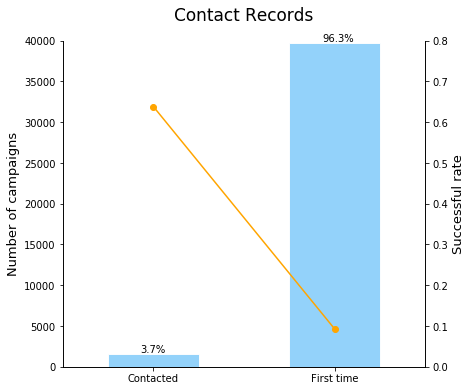

In [304]:
data1['pdays_band'] = data1['pdays'].copy()

data1.loc[ data1['pdays'] <= 30, 'pdays_band'] = 0
data1.loc[(data1['pdays'] > 30) ,'pdays_band'] = 1

fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,6))
ax2 = ax1.twinx() 

x = [1,2]
y1 = [data1[data1['pdays_band']==0]['pdays_band'].count(),data1[data1['pdays_band']==1]['pdays_band'].count()]
y2 = [data1[data1['pdays_band']==0]['y'].mean(),data1[data1['pdays_band']==1]['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.5, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['Contacted','First time'])
ax1.set_ylim([0,40000])
ax1.set_ylabel('Number of campaigns', fontsize = 13)
ax1.set_xlim([0.5,2.5])

for i in range(2):
    ax1.text(x[i]-0.07, y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.8])
ax2.set_ylabel('Successful rate', fontsize = 13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Contact Records', fontsize = 17, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Contact Records.png',dpi = 600)
plt.show()

<Figure size 432x360 with 0 Axes>

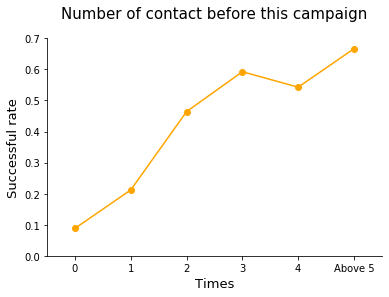

In [279]:
data1['previous_band'] = data1['previous'].copy()

data1.loc[ data1['previous'] >= 5, 'previous_band'] = 5

fig = plt.figure(figsize=(6,5))
fig, ax=plt.subplots()

x = [0,1,2,3,4,5]
y = [data1[data1['previous_band']==0]['y'].mean(),data1[data1['previous_band']==1]['y'].mean(),data1[data1['previous_band']==2]['y'].mean(),data1[data1['previous_band']==3]['y'].mean(),data1[data1['previous_band']==4]['y'].mean(),data1[data1['previous_band']==5]['y'].mean()]

plt.xticks(x ,['0','1','2','3','4','Above 5'])

plt.plot(x, y, 'o-', color = 'orange')
plt.ylim([0,0.7])
plt.xlim([-0.5,5.5])
plt.xlabel('Times', fontsize = 13)
plt.ylabel('Successful rate', fontsize = 13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of contact before this campaign', pad=20, fontsize = 15)
plt.savefig('C://Users/carter840826/bank marketing/Number of contact before this campaign.png',dpi = 600)

plt.show()

<Figure size 432x288 with 0 Axes>

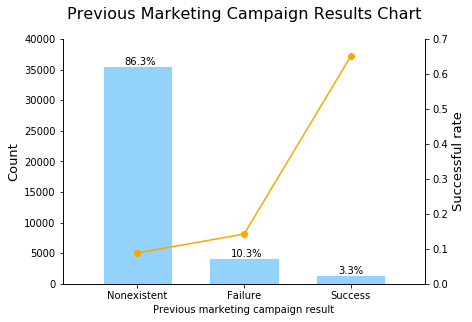

In [281]:
data1['poutcome_band'] = data1['poutcome'].copy()
    
data1.loc[ data1['poutcome'] == 'nonexistent', 'poutcome_band'] = 0
data1.loc[ data1['poutcome'] == 'failure', 'poutcome_band'] = 1
data1.loc[ data1['poutcome'] == 'success', 'poutcome_band'] = 2


fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(6.5,4.5))
ax2 = ax1.twinx() 

x = [1,2,3]
y1 = [data1[data1['poutcome_band']==0]['poutcome_band'].count(),data1[data1['poutcome_band']==1]['poutcome_band'].count(),data1[data1['poutcome_band']==2]['poutcome_band'].count()]
y2 = [data1[data1['poutcome_band']==0]['y'].mean(),data1[data1['poutcome_band']==1]['y'].mean(),data1[data1['poutcome_band']==2]['y'].mean()]

ax1.bar(x, y1, alpha = 0.9, width = 0.65, facecolor = 'lightskyblue', edgecolor = 'white', label='one')
plt.xticks(x ,['Nonexistent','Failure','Success'])
ax1.set_xlabel('Previous marketing campaign result')
ax1.set_ylim([0,40000])
ax1.set_xlim([0.3,3.7])
ax1.set_ylabel('Count', fontsize = 13)

for i in range(3):
    ax1.text(x[i]-0.12, y1[i]+200, '%.1f' %(y1[i]/len(data1)*100)+'%')

ax2.plot(x, y2, 'o-', color = 'orange')
ax2.set_ylim([0,0.7])
ax2.set_xlabel('Number of times', fontsize = 13)
ax2.set_ylabel('Successful rate', fontsize = 13)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.title('Previous Marketing Campaign Results Chart', fontsize = 16, pad = 20)
plt.savefig('C://Users/carter840826/bank marketing/Previous Marketing Campaign Results Chart.png',dpi = 600)
plt.show()

-0.6010422126167992 0.09552147353709682 0.19689012697171746 -0.6750668396705288 -0.7645864107991608


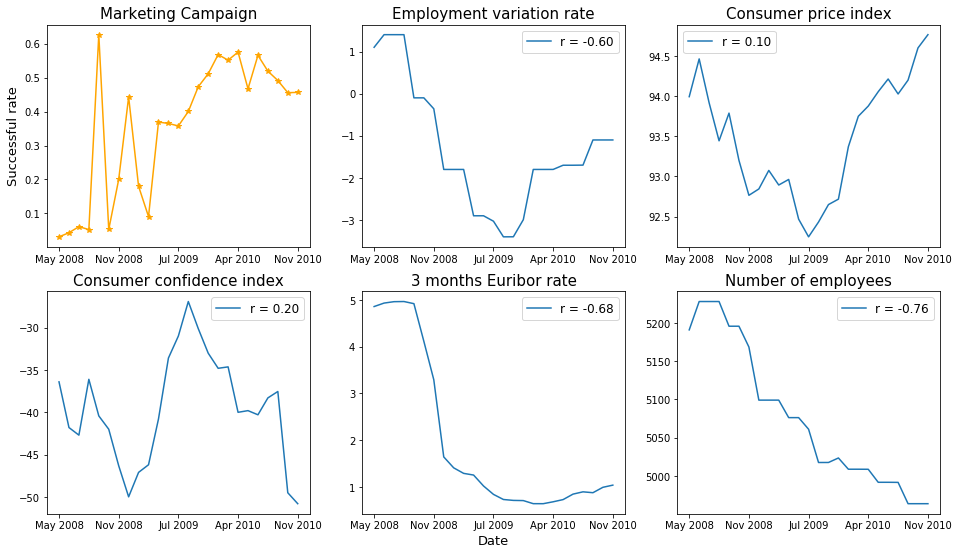

In [283]:
import numpy as np

day = [0,7764,12138,18823,23998,24065,27681,27691,27973,30431,36225,36940,37118,38155,38602,38959,39131,39395,39569,39781,40010,40321,40554,40857,41061,41189]
winrate= day.copy()
x1= day.copy()
x2= day.copy()
x3= day.copy()
x4= day.copy()
x5= day.copy()

for i in range(len(day)-1):
    winrate[i] = data1[day[i]:day[i+1]]['y'].mean()
    x1[i] = data1[day[i]:day[i+1]]['emp.var.rate'].mean()
    x2[i] = data1[day[i]:day[i+1]]['cons.price.idx'].mean()
    x3[i] = data1[day[i]:day[i+1]]['cons.conf.idx'].mean()
    x4[i] = data1[day[i]:day[i+1]]['euribor3m'].mean()
    x5[i] = data1[day[i]:day[i+1]]['nr.employed'].mean()
del(winrate[-1],x1[-1],x2[-1],x3[-1],x4[-1],x5[-1])
#winrate[4] = 0.1
#winrate[7] = 0.1
#相關係數
c1 = np.corrcoef(winrate,x1)
c2 = np.corrcoef(winrate,x2)
c3 = np.corrcoef(winrate,x3)
c4 = np.corrcoef(winrate,x4)
c5 = np.corrcoef(winrate,x5)
print(c1[0,1],c2[0,1],c3[0,1],c4[0,1],c5[0,1])

fig = plt.figure(figsize=(16,9))

plt.subplot(231)
plt.plot(range(len(winrate)), winrate, '*-', color = 'orange')
plt.ylabel('Successful rate',fontsize = 13)
plt.title('Marketing Campaign',fontsize = 15)

plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])
  
plt.subplot(232)
plt.plot(range(len(x1)),x1 ,label = 'r = %0.2f' % c1[0,1])
plt.legend(fontsize='large')
plt.title('Employment variation rate',fontsize = 15)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

plt.subplot(233)
plt.plot(range(len(x2)),x2,label = 'r = %0.2f' % c2[0,1])
plt.legend(fontsize='large')
plt.title('Consumer price index',fontsize = 15)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

plt.subplot(234)
plt.plot(range(len(x3)),x3,label = 'r = %0.2f' % c3[0,1])
plt.legend(fontsize='large')
plt.title('Consumer confidence index',fontsize = 15)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

plt.subplot(235)
plt.plot(range(len(x4)),x4,label = 'r = %0.2f' % c4[0,1])
plt.legend(fontsize='large')
plt.title('3 months Euribor rate',fontsize = 15)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])
plt.xlabel('Date', fontsize = 13)

plt.subplot(236)
plt.plot(range(len(x5)),x5,label = 'r = %0.2f' % c5[0,1])
plt.legend(fontsize='large')
plt.title('Number of employees',fontsize = 15)
plt.xticks([0,6,12,18,24],['May 2008','Nov 2008','Jul 2009','Apr 2010','Nov 2010'])

plt.savefig('C://Users/carter840826/bank marketing/Financial Factor.png',dpi = 600)
plt.show()



# Machine learning model

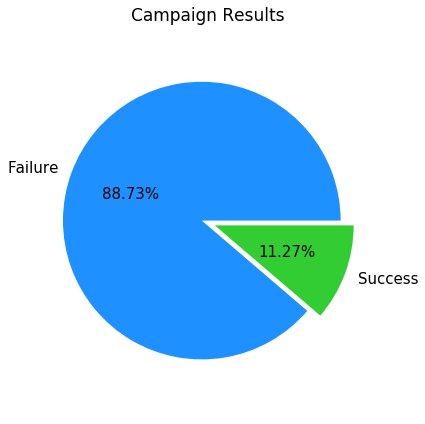

In [302]:
fig = plt.figure(figsize=(6,6))

x = [1,2]
y = [data1[data1['y']==0]['y'].count(),data1[data1['y']==1]['y'].count()]


plt.pie(y, labels = ['Failure','Success'], 
        autopct = "%1.2f%%", 
        explode = (0,0.1), 
        pctdistance = 0.55, 
        textprops = {"fontsize" : 15}, 
        colors = ['dodgerblue','limegreen']
       )
plt.title('Campaign Results', fontsize = 17, pad = 0)
plt.axis('equal')
plt.tight_layout()
plt.savefig('C://Users/carter840826/bank marketing/Campaign Results.png',dpi = 600)

plt.show()

In [15]:
data1_bin = data1.copy()

data1_bin['job_band'] = data1_bin['job'].map( {'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':0} ).astype(int)
data1_bin['marital_band'] = data1_bin['marital'].map( {'divorced':1,'married':2,'single':3,'unknown':0} ).astype(int)
data1_bin['education_band'] = data1_bin['education'].map( { 'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'illiterate':5,'professional.course':6,'university.degree':7,'unknown':0} ).astype(int)
data1_bin['default_band'] = data1_bin['default'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
data1_bin['housing_band'] = data1_bin['housing'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
data1_bin['loan_band'] = data1_bin['loan'].map( {'yes': 1, 'no': 2, 'unknown': 0} ).astype(int)
data1_bin['contact_band'] = data1_bin['contact'].map( { 'cellular':1,'telephone':2} ).astype(int)
data1_bin['month_band'] = data1_bin['month'].map( { 'jun':1,'feb':2, 'mar':3, 'apr':4, 'may':5, "jun":6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12} ).astype(int)
data1_bin['dayofweek_band'] = data1_bin['day_of_week'].map( { 'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5} ).astype(int)

data1_bin.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 36 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int32
ageband           41188 non-null int64
duration_band

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda

KeyboardInterrupt: 

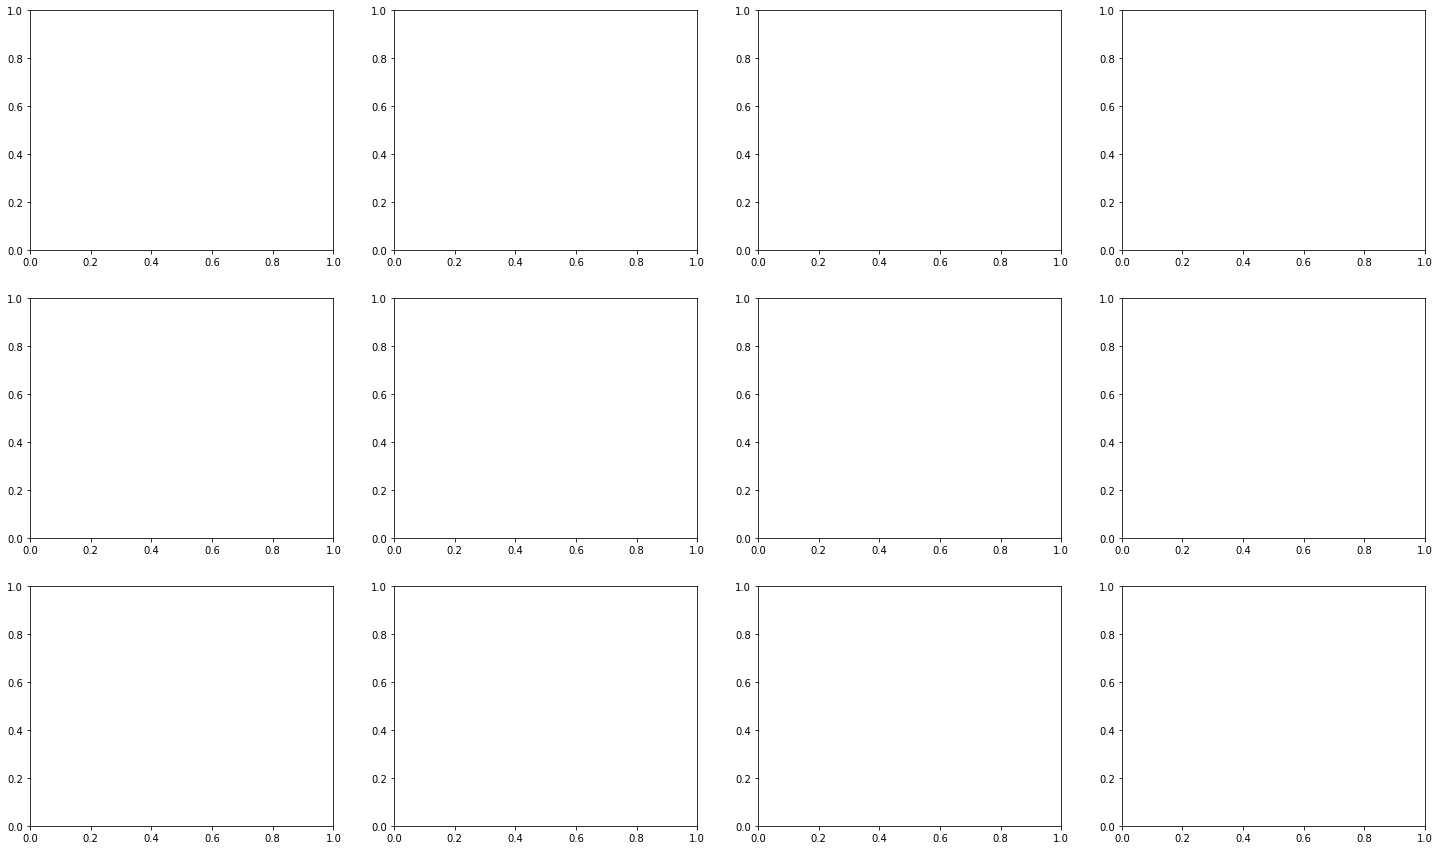

In [262]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

MLA = [
    #GLM
    linear_model.LogisticRegression(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 22),
    
    #SVM
    svm.SVC(kernel = 'rbf', gamma= 0.1, probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(n_estimators = 100),
    ensemble.BaggingClassifier(n_estimators = 100),
    ensemble.GradientBoostingClassifier(n_estimators = 100),
    ensemble.RandomForestClassifier(n_estimators = 100),
    
    #Neural network models
    MLPClassifier(hidden_layer_sizes=(50,)),
    
    XGBClassifier()
    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = KFold(n_splits=10, shuffle=True, random_state=0) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
data1_x_bin = ['ageband','duration_band','campaign_band','pdays_band','previous_band','poutcome_band','job_band','marital_band','education_band','default_band','housing_band','loan_band','contact_band','month_band','dayofweek_band','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X_train, X_test, y_train, y_test = train_test_split(data1_bin[data1_x_bin], data1_bin[Target], test_size = 0.2, train_size = 0.8, random_state = 0)
MLA_predict = y_test.copy()

#index through MLA and save performance to table
row_index = 0
col = [0,0,0,1,1,1,2,2,2,3,3,3]
row = [0,1,2,0,1,2,0,1,2,0,1,2]
fig, ax_arr = plt.subplots(nrows = 3, ncols = 4, figsize = (25,15))
for alg in MLA:
    
    print(alg)

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_bin[data1_x_bin], data1_bin[Target], cv = cv_split, scoring = 'accuracy' ,return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_test)
    print(confusion_matrix(y_test, alg.predict(X_test)))
    print(round(accuracy_score(y_test, alg.predict(X_test)),2)*100)
    
    #plt auc
    probs = alg.predict_proba(X_test)
    preds = probs[:,1]
    print(probs)
    print(alg.predict(X_test))
    fpralg, tpralg, thresholdalg = metrics.roc_curve(y_test, preds, pos_label=1)
    roc_aucalg = metrics.auc(fpralg, tpralg)
    
    ax_arr[row[row_index],col[row_index]].plot(fpralg, tpralg, 'b', label = 'AUC = %0.2f' % roc_aucalg)
    ax_arr[row[row_index],col[row_index]].plot([0, 1], [0, 1],'r--')
    ax_arr[row[row_index],col[row_index]].set_title('Receiver Operating Characteristic '+ MLA_name, fontsize=15, pad = 15)
    ax_arr[row[row_index],col[row_index]].set_ylabel('True Positive Rate',fontsize=13,labelpad=7)
    ax_arr[row[row_index],col[row_index]].set_xlabel('False Positive Rate',fontsize=13)
    ax_arr[row[row_index],col[row_index]].legend(loc = 'lower right', prop={'size': 16})
    
    row_index+=1
    
plt.savefig('C://Users/carter840826/bank marketing/AUC.png',dpi = 600)
plt.show()
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
print(MLA_compare)


fig = plt.figure()
sns_plot = sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, palette="GnBu")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig('C://Users/carter840826/bank marketing/MLA Performance.png',dpi = 600)


## IMBALANCED DATASET FIX

In [46]:
data1_majority = data1_bin[data1_bin['y'] == 0]
data1_minority = data1_bin[data1_bin['y'] == 1]

print(len(data1_minority),len(data1_majority))

4640 36548


In [294]:
from sklearn.utils import resample

data1_minority_oversampled = resample(data1_minority, replace=True, n_samples= len(data1_minority)*3, random_state=0)
data1_oversampled = pd.concat([data1_majority, data1_minority_oversampled])

print(len(data1_minority_oversampled))

13920


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning

[[6843  452]
 [1314 1485]]
83.0
[[9.98843053e-01 1.15694745e-03]
 [9.71369811e-01 2.86301888e-02]
 [9.60894414e-01 3.91055862e-02]
 ...
 [1.27277073e-01 8.72722927e-01]
 [9.99258151e-01 7.41848764e-04]
 [9.27407913e-01 7.25920870e-02]]
[0 0 0 ... 1 0 0]
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[[6773  522]
 [ 975 1824]]
85.0
[[0.52356451 0.47643549]
 [0.50786581 0.49213419]
 [0.51146718 0.48853282]
 ...
 [0.48574173 0.51425827]
 [0.51993913 0.48006087]
 [0.50823851 0.49176149]]
[0 0 0 ... 1 0 0]
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[[6868  427]
 [ 164 2635]]
94.0
[[1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 ...
 [0.1 0.9]
 [1.  0. ]
 [0.9 0.1]]
[0 1 1 ... 1 0 0]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when 

[[6574  721]
 [ 556 2243]]
87.0
[[0.99145835 0.00854165]
 [0.822689   0.177311  ]
 [0.9106073  0.0893927 ]
 ...
 [0.16110909 0.83889091]
 [0.99093674 0.00906326]
 [0.81755311 0.18244689]]
[0 0 0 ... 1 0 0]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

[[6891  404]
 [ 167 2632]]
94.0
[[1.  0. ]
 [0.1 0.9]
 [0.5 0.5]
 ...
 [0.  1. ]
 [1.  0. ]
 [0.9 0.1]]
[0 1 0 ... 1 0 0]
LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\

C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

[[6509  786]
 [ 797 2002]]
84.0
[[0.97238555 0.02761445]
 [0.85209256 0.14790744]
 [0.78599602 0.21400398]
 ...
 [0.10021118 0.89978882]
 [0.98163464 0.01836536]
 [0.79996508 0.20003492]]
[0 0 0 ... 1 0 0]
GaussianNB(priors=None, var_smoothing=1e-09)


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[[6353  942]
 [1156 1643]]
79.0
[[9.99982438e-01 1.75617575e-05]
 [9.99614541e-01 3.85459196e-04]
 [9.99686369e-01 3.13631310e-04]
 ...
 [7.18505098e-25 1.00000000e+00]
 [9.99934211e-01 6.57888843e-05]
 [9.97450051e-01 2.54994933e-03]]
[0 0 0 ... 1 0 0]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

[[6526  769]
 [ 477 2322]]
88.0
[[1.  0. ]
 [0.4 0.6]
 [0.8 0.2]
 ...
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]]
[0 1 0 ... 1 0 0]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[[6752  543]
 [ 146 2653]]
93.0
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[0 1 1 ... 1 0 0]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_

C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carter840826\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[6563  732]
 [ 521 2278]]
88.0
[[0.991954   0.00804598]
 [0.80431163 0.19568834]
 [0.8994595  0.10054054]
 ...
 [0.15151381 0.8484862 ]
 [0.99512035 0.00487963]
 [0.790867   0.20913301]]
[0 0 0 ... 1 0 0]


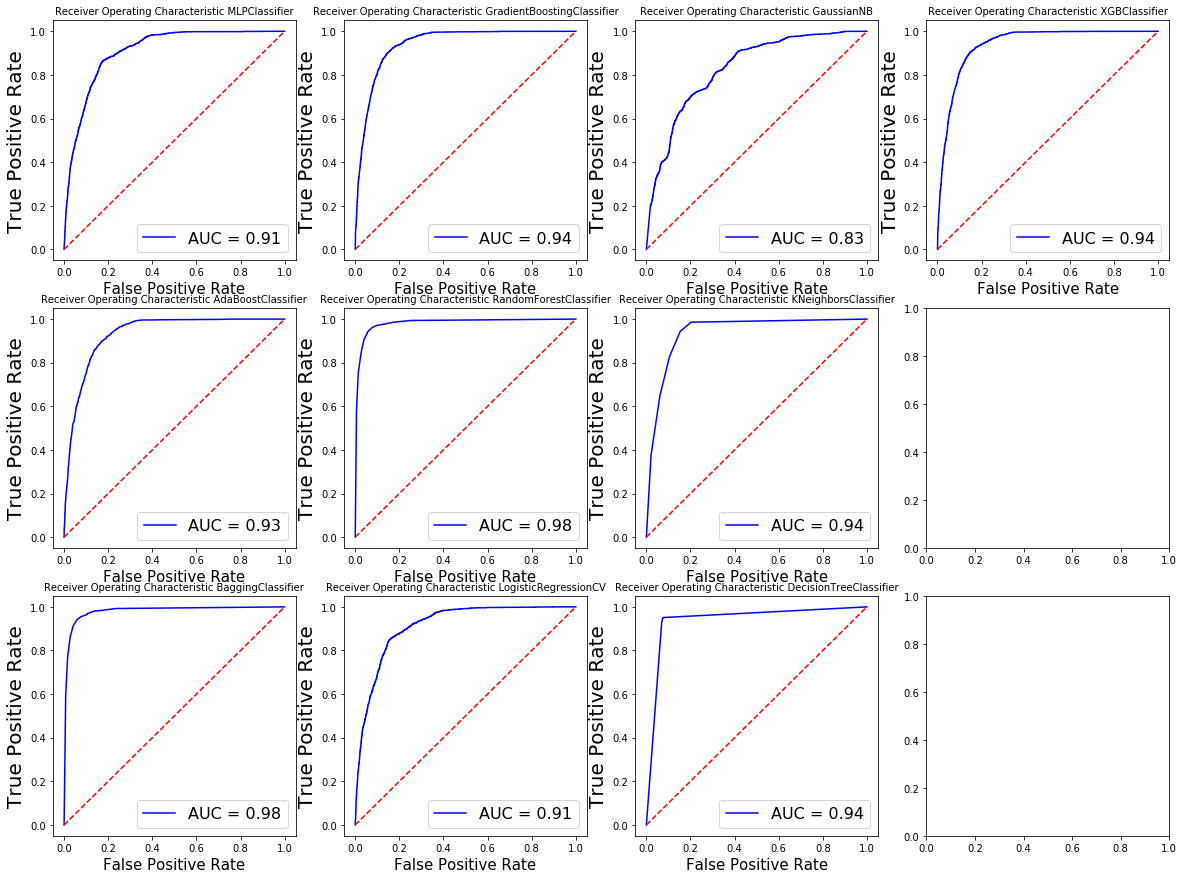

                     MLA Name  \
4      RandomForestClassifier   
2           BaggingClassifier   
8      DecisionTreeClassifier   
7        KNeighborsClassifier   
3  GradientBoostingClassifier   
9               XGBClassifier   
1          AdaBoostClassifier   
5        LogisticRegressionCV   
0               MLPClassifier   
6                  GaussianNB   

                                      MLA Parameters MLA Train Accuracy Mean  \
4  {'bootstrap': True, 'class_weight': None, 'cri...                0.994575   
2  {'base_estimator': None, 'bootstrap': True, 'b...                0.994285   
8  {'class_weight': None, 'criterion': 'gini', 'm...                0.996493   
7  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.925964   
3  {'criterion': 'friedman_mse', 'init': None, 'l...                0.873511   
9  {'base_score': 0.5, 'booster': 'gbtree', 'cols...                0.872709   
1  {'algorithm': 'SAMME.R', 'base_estimator': Non...                 0.85116

Text(0, 0.5, 'Algorithm')

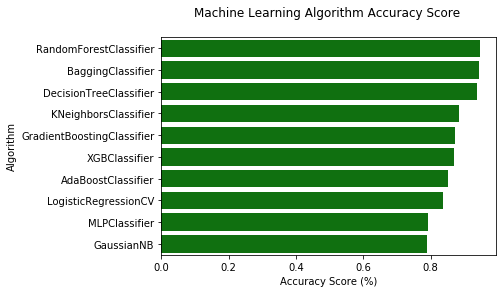

In [49]:
MLA = [
    #Neural network models
    MLPClassifier(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),

    XGBClassifier()
    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = KFold(n_splits=10, shuffle=True, random_state=0) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
data1_x_bin = ['ageband','duration_band','campaign_band','pdays_band','previous_band','poutcome_band','job_band','marital_band','education_band','default_band','housing_band','loan_band','contact_band','month_band','dayofweek_band','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X_train, X_test, y_train, y_test = train_test_split(data1_oversampled[data1_x_bin], data1_oversampled[Target], test_size = 0.2, train_size = 0.8, random_state = 0)
MLA_predict = y_test.copy()

#index through MLA and save performance to table
row_index = 0
col = [0,0,0,1,1,1,2,2,2,3,3,3]
row = [0,1,2,0,1,2,0,1,2,0,1,2]
fig, ax_arr = plt.subplots(nrows = 3, ncols = 4, figsize = (20,15))
for alg in MLA:
    
    print(alg)

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_oversampled[data1_x_bin], data1_oversampled[Target], cv = cv_split, scoring = 'accuracy' ,return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_test)
    print(confusion_matrix(y_test, alg.predict(X_test)))
    print(round(accuracy_score(y_test, alg.predict(X_test)),2)*100)
    
    #plt auc
    probs = alg.predict_proba(X_test)
    preds = probs[:,1]
    print(probs)
    print(alg.predict(X_test))
    fpralg, tpralg, thresholdalg = metrics.roc_curve(y_test, preds, pos_label=1)
    roc_aucalg = metrics.auc(fpralg, tpralg)
    
    ax_arr[row[row_index],col[row_index]].plot(fpralg, tpralg, 'b', label = 'AUC = %0.2f' % roc_aucalg)
    ax_arr[row[row_index],col[row_index]].plot([0, 1], [0, 1],'r--')
    ax_arr[row[row_index],col[row_index]].set_title('Receiver Operating Characteristic '+ MLA_name, fontsize=10)
    ax_arr[row[row_index],col[row_index]].set_ylabel('True Positive Rate',fontsize=20)
    ax_arr[row[row_index],col[row_index]].set_xlabel('False Positive Rate',fontsize=15)
    ax_arr[row[row_index],col[row_index]].legend(loc = 'lower right', prop={'size': 16})
    
    row_index+=1
plt.tight_layout()
plt.show()
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
print(MLA_compare)


fig = plt.figure()
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'g')
plt.tight_layout()
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

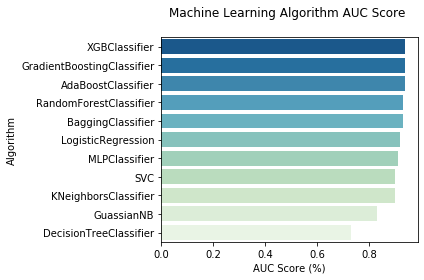

In [292]:
fig = plt.figure()
sns_plot = sns.barplot(y=['XGBClassifier','GradientBoostingClassifier','AdaBoostClassifier','RandomForestClassifier','BaggingClassifier','LogisticRegression','MLPClassifier','SVC','KNeighborsClassifier','GuassianNB','DecisionTreeClassifier'], 
            x=[0.94,0.94,0.94,0.93,0.93,0.92,0.91,0.90,0.90,0.83,0.73] , data = MLA_compare, palette="GnBu_r",orient='h')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm AUC Score \n')
plt.xlabel('AUC Score (%)')
plt.ylabel('Algorithm')
plt.tight_layout()
fig = sns_plot.get_figure()
fig.savefig('C://Users/carter840826/bank marketing/AUC Bar.png',dpi = 600)

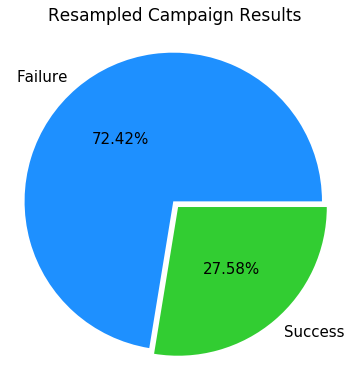

In [298]:
fig = plt.figure(figsize=(6,6))

x = [1,2]
y = [36548,13920]


plt.pie(y, labels = ['Failure','Success'], 
        autopct = "%1.2f%%", 
        explode = (0,0.05), 
        pctdistance = 0.55, 
        textprops = {"fontsize" : 15}, 
        colors = ['dodgerblue','limegreen']
       )
plt.title('Resampled Campaign Results', fontsize = 17, pad = 20)
plt.axis('equal')

plt.savefig('C://Users/carter840826/bank marketing/Campaign Results_Resampling.png',dpi = 600)

plt.show()